In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle

In [2]:
dest='./data'
Types=['dog','cat']

In [3]:
for types in Types:
    path=os.path.join(dest,types)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

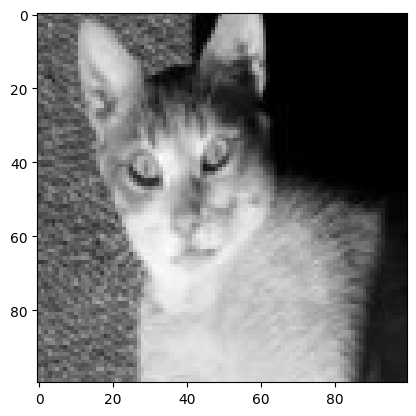

In [4]:
new_array= cv2.resize(img_array, (100, 100))
plt.imshow(new_array, cmap='gray')
plt.show()

We want to downscale more as it will speed up the model speed and will not affect much as our problem to predict cat vs dog and do not care much about the details.


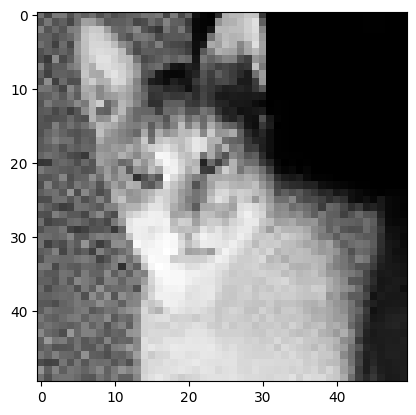

In [5]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

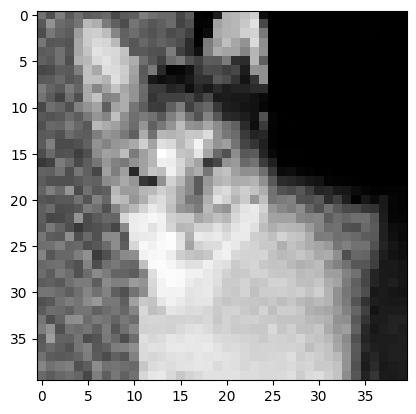

In [6]:
new_array= cv2.resize(img_array, (40, 40))
plt.imshow(new_array, cmap='gray')
plt.show()

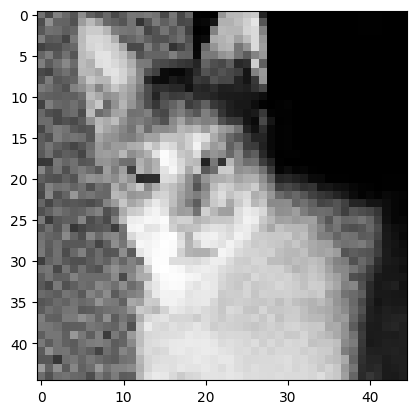

In [7]:
new_array= cv2.resize(img_array, (45, 45))
plt.imshow(new_array, cmap='gray')
plt.show()

However, we do not want to downscale so much that it lose its shape. Therefore, I believe that IMG_SIZE= 45 is good.

In [8]:
IMG_SIZE=45

Resize to the same size so that result will be more accurate.

We gray scale the image as the colour does not matter in our pobelm and will slow our model speed.

In [9]:
training_data=[]

def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()

In [10]:
print(len(training_data))

20285


In [11]:
random.shuffle(training_data)


In [12]:
print(training_data[0])

[array([[  5,   4,   3, ...,  43,  22,  25],
       [  5,   4,   3, ...,  38,  25,  34],
       [  5,   4,   3, ...,  29,  27,   4],
       ...,
       [143, 209, 232, ...,  72,  68,  57],
       [131, 207, 227, ...,  48,  20,  91],
       [147, 211, 226, ...,  32,  16,  60]], dtype=uint8), 1]


In [13]:
X= []
y= []

In [14]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

In [15]:
pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
X[0]

array([[[  5],
        [  4],
        [  3],
        ...,
        [ 43],
        [ 22],
        [ 25]],

       [[  5],
        [  4],
        [  3],
        ...,
        [ 38],
        [ 25],
        [ 34]],

       [[  5],
        [  4],
        [  3],
        ...,
        [ 29],
        [ 27],
        [  4]],

       ...,

       [[143],
        [209],
        [232],
        ...,
        [ 72],
        [ 68],
        [ 57]],

       [[131],
        [207],
        [227],
        ...,
        [ 48],
        [ 20],
        [ 91]],

       [[147],
        [211],
        [226],
        ...,
        [ 32],
        [ 16],
        [ 60]]], dtype=uint8)

In [17]:
y[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1])